In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
%pip install seaborn
import seaborn as sns

In [3]:
%pip install "plotly[express]"

In [4]:
import plotly.express as px

In [5]:
%pip install nbformat

In [45]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [47]:
#Loading dataset 
df = pd.read_csv('IMDb Movies India.csv')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#printing first 5 rows
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [49]:
#printing first 10 rows
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [50]:
#printing last 5 rows
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [51]:
#printing last 10 rows
df.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,Zulm Ka Jawab,-1995.0,NaN,Action,NaN,NaN,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15500,Zulm Ka Muqabla,-1993.0,NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15501,Zulm Ki Hukumat,-1992.0,NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,-1979.0,NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [52]:
#for finding shape (no. of rows & columns )of the dataset
df.shape

(15509, 10)

In [53]:
#to find mean , std, min, max, etc.
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


***Data Cleaning - Handling the missing values***

In [54]:
df.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [55]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

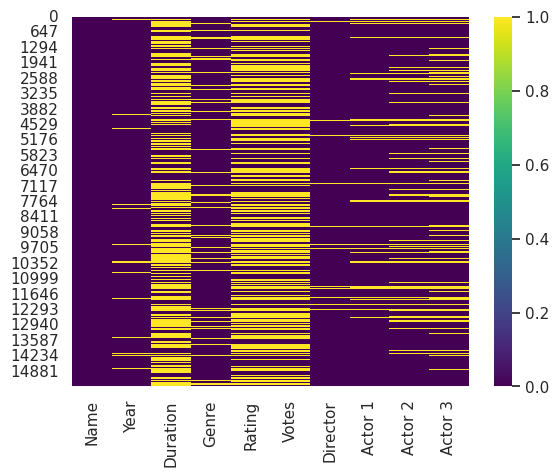

In [56]:
sns.heatmap(df.isnull(),cmap='viridis')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 727.1+ KB


In [58]:
df.dropna(inplace = True)

In [59]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [60]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [61]:
df.describe()

,Year,Rating
count,5659.000000,5659.000000
mean,-1996.247570,5.898533
std,19.741839,1.381165
min,-2021.000000,1.100000
25%,-2013.000000,5.000000
50%,-2002.000000,6.100000
75%,-1983.000000,6.900000
max,-1931.000000,10.000000


In [62]:
df = df.drop(columns='Name',axis=1)
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,-2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [63]:
df.drop_duplicates(inplace = True)

In [64]:
df['Actor 1'].value_counts()

Actor 1
Amitabh Bachchan      104
Mithun Chakraborty     93
Ashok Kumar            91
Dharmendra             90
Jeetendra              89
                     ... 
Murad Ali               1
Amarjeet                1
Rinku Jaiswal           1
Usha Kiran              1
Darsheel Safary         1
Name: count, Length: 1960, dtype: int64

In [65]:
df['Director'].value_counts()

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
                        ..
Sriram Raja              1
Randeep Jha              1
Vicky Bhardwaj           1
Salar Shaikh             1
Mozez Singh              1
Name: count, Length: 2431, dtype: int64

In [66]:
df['Genre'].value_counts()

Genre
Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: count, Length: 376, dtype: int64

In [67]:
sns.set()

<Axes: xlabel='Rating', ylabel='count'>

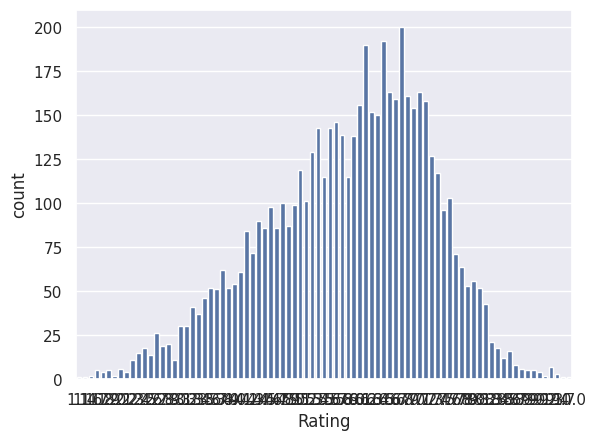

In [68]:
sns.countplot(data=df , x="Rating")


In [69]:
df['Rating'] = df['Rating'].round()
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,-2019.0,110 min,"Comedy, Romance",4.0,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,-1997.0,147 min,"Comedy, Drama, Musical",5.0,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,-2005.0,142 min,"Drama, Romance, War",7.0,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,-2012.0,82 min,"Horror, Mystery, Thriller",6.0,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,-2015.0,115 min,Drama,6.0,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,-2001.0,153 min,"Biography, Drama, History",6.0,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,-1989.0,125 min,"Action, Crime, Drama",6.0,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,-1999.0,129 min,"Action, Drama",4.0,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


<Axes: xlabel='Rating', ylabel='count'>

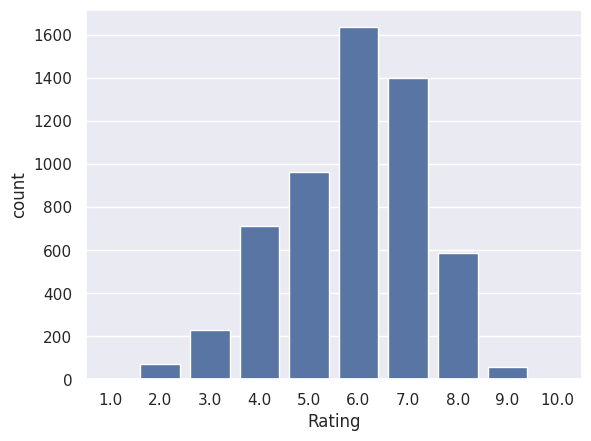

In [70]:
sns.countplot(data=df , x="Rating")


In [71]:
df['Duration'] = df['Duration'].str.replace(' min','')
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,-2019.0,110,"Comedy, Romance",4.0,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,-1997.0,147,"Comedy, Drama, Musical",5.0,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,-2005.0,142,"Drama, Romance, War",7.0,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,-2012.0,82,"Horror, Mystery, Thriller",6.0,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,-2015.0,115,Drama,6.0,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,-2001.0,153,"Biography, Drama, History",6.0,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,-1989.0,125,"Action, Crime, Drama",6.0,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,-1999.0,129,"Action, Drama",4.0,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [72]:
df['Duration'] = df['Duration'].astype(int)
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,-2019.0,110,"Comedy, Romance",4.0,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,-1997.0,147,"Comedy, Drama, Musical",5.0,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,-2005.0,142,"Drama, Romance, War",7.0,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,-2012.0,82,"Horror, Mystery, Thriller",6.0,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,-2015.0,115,Drama,6.0,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,-2001.0,153,"Biography, Drama, History",6.0,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,-1989.0,125,"Action, Crime, Drama",6.0,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,-1999.0,129,"Action, Drama",4.0,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [73]:
df['Duration'] = df['Duration']/10
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,-2019.0,10.9,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,-2019.0,11.0,"Comedy, Romance",4.0,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,-1997.0,14.7,"Comedy, Drama, Musical",5.0,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,-2005.0,14.2,"Drama, Romance, War",7.0,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,-2012.0,8.2,"Horror, Mystery, Thriller",6.0,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,-2015.0,11.5,Drama,6.0,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,-2001.0,15.3,"Biography, Drama, History",6.0,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,-1989.0,12.5,"Action, Crime, Drama",6.0,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,-1999.0,12.9,"Action, Drama",4.0,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [74]:
df['Duration'] = df['Duration'].round()
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,-2019.0,11.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,-2019.0,11.0,"Comedy, Romance",4.0,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,-1997.0,15.0,"Comedy, Drama, Musical",5.0,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,-2005.0,14.0,"Drama, Romance, War",7.0,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,-2012.0,8.0,"Horror, Mystery, Thriller",6.0,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,-2015.0,12.0,Drama,6.0,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,-2001.0,15.0,"Biography, Drama, History",6.0,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,-1989.0,12.0,"Action, Crime, Drama",6.0,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,-1999.0,13.0,"Action, Drama",4.0,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


<Axes: xlabel='count', ylabel='Duration'>

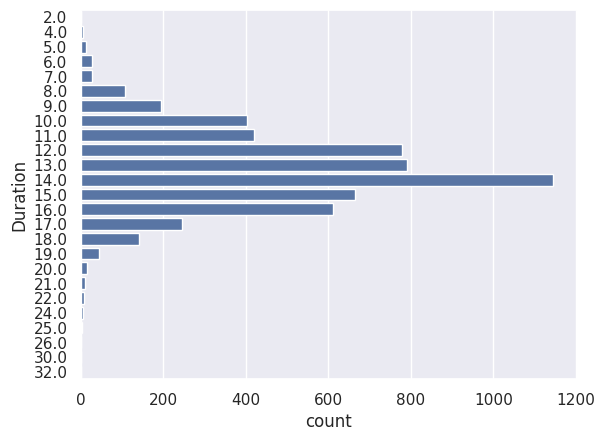

In [75]:
sns.countplot(data=df , y="Duration")


In [76]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0])

1          Drama
3         Comedy
3        Romance
5         Comedy
5          Drama
          ...   
15503      Drama
15505     Action
15505      Drama
15508     Action
15508      Drama
Name: Genre, Length: 11979, dtype: object

In [77]:
df['Votes']= pd.to_numeric(df['Votes'].str.replace(',',''))

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      11979 non-null  float64
 1   Duration  11979 non-null  float64
 2   Genre     11979 non-null  object 
 3   Rating    11979 non-null  float64
 4   Votes     11979 non-null  int64  
 5   Director  11979 non-null  object 
 6   Actor 1   11979 non-null  object 
 7   Actor 2   11979 non-null  object 
 8   Actor 3   11979 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 701.9+ KB


***DATA VISUALISATION***

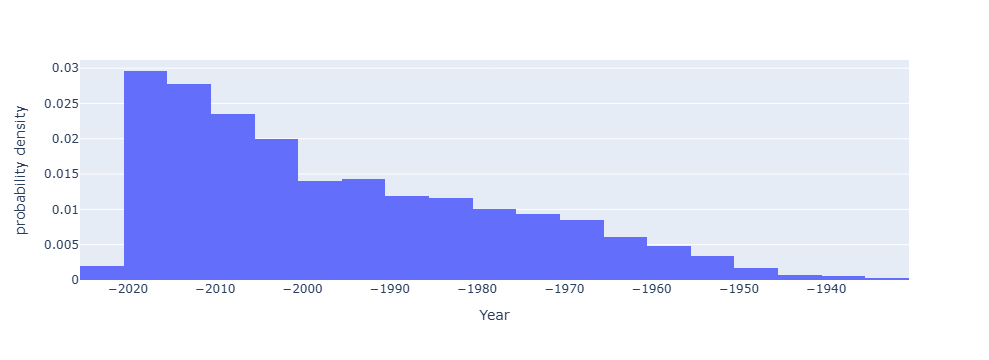

In [79]:
year = px.histogram(df,x = 'Year', histnorm = 'probability density',nbins = 30)
year.show()

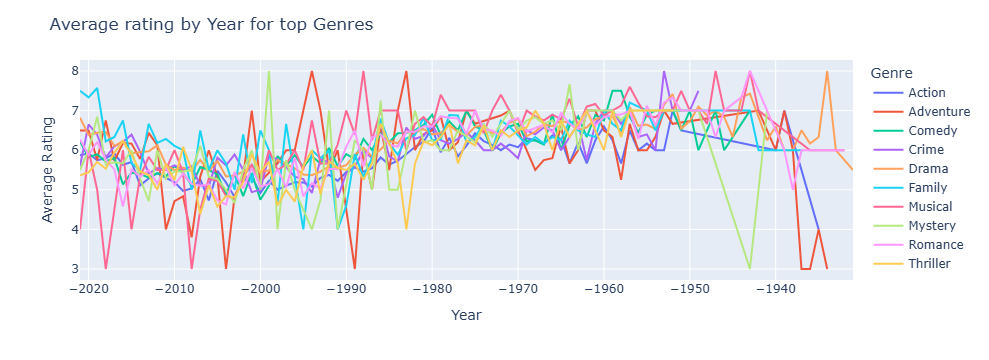

In [80]:
#average rating per year 
avg = df.groupby(['Year','Genre'])['Rating'].mean().reset_index()

#top genres (10)
tg = df['Genre'].value_counts().head(10).index

#filtering top 3 genres
avg = avg[avg['Genre'].isin(tg)]

#line plot with plotly express
fig = px.line(avg,x = 'Year',y='Rating',color ='Genre')

#updating
fig.update_layout(title='Average rating by Year for top Genres' , xaxis_title = 'Year',yaxis_title = 'Average Rating')

fig.show()

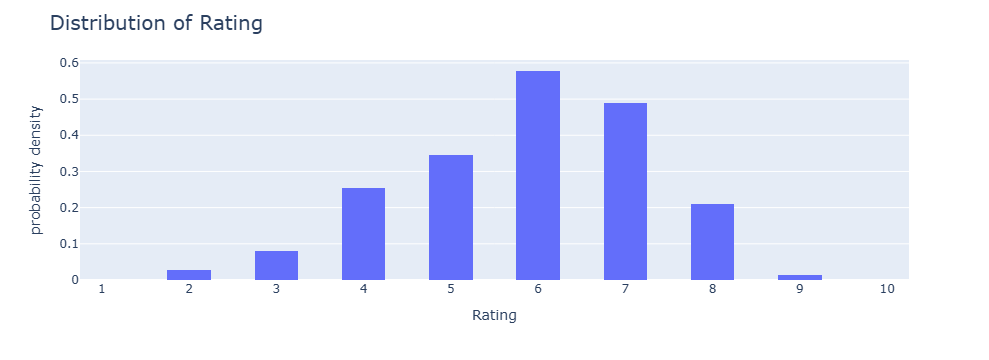

In [81]:
#histogram - distributiopn of ratings and its probability density 
rating_fig.update_layout(title='Distribution of Rating',title_pad= dict(t=20),title_font=dict(size=20),xaxis_title = 'Rating')
rating_fig.show()

In [88]:
#grouping columns 

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = genre_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = genre_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = genre_mean_rating    


In [90]:
#setting predictor & target variable

x = df[['Year','Votes','Duration','Genre_mean_rating','Director_encoded','Actor1_encoded','Actor2_encoded','Actor3_encoded']]
y = df['Rating']

In [91]:
#Splitting data int testing and training data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state =42)

In [93]:
model = LinearRegression()
model.fit(x_train,y_train)
model_pred = model.predict(x_test)

In [96]:
#evaluating performance
print('performance evaluation : ','\n')
print('mean squared error : ', mean_squared_error(y_test,model_pred))
print('mean absolute error : ', mean_absolute_error(y_test,model_pred))
print('R2 score : ' , r2_score(y_test,model_pred))

performance evaluation :  

mean squared error :  0.7250678739028134
mean absolute error :  0.5928080066282038
R2 score :  0.6320751275843466


In [97]:
x.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,-2019.0,8,11.0,6.048999,7.000000,6.048999,6.048999,6.048999
3,-2019.0,35,11.0,5.740327,4.000000,5.740327,5.740327,5.740327
3,-2019.0,35,11.0,5.808696,4.000000,5.808696,5.808696,5.808696
5,-1997.0,827,15.0,5.740327,5.486486,5.740327,5.740327,5.740327
5,-1997.0,827,15.0,6.048999,5.486486,6.048999,6.048999,6.048999


In [98]:
y.head()

1    7.0
3    4.0
3    4.0
5    5.0
5    5.0
Name: Rating, dtype: float64

In [ ]:
data = {'Year':[2019],'Votes':[36],'Duration':[111],'Genre_mean_rating':[5.8],'Director_encoded':[4.5],'Actor1_encoded':[5.3],'Actor2_encoded':[4.5],'Actor3_encoded'}
trail = pd.DataFrame(data)

In [ ]:
rating_prediction = model.predict(trail)

#predicted result from the model 
print ('Predicted Rating : ',rating_prediction[0])